# Updated figures

In [1]:
%matplotlib notebook
import sys
import os.path as osp
sys.path.append(osp.dirname(osp.dirname(osp.abspath('__file__'))))
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pickle
from cycler import cycler
from config import SAVE_DIR
from acoc import acoc_plotter as plotter
import seaborn as sns

D:\Program\Anaconda3\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
gpu_dropped = [68, 140, 335, 598, 673, 837, 868, 932, 1070, 1063]
cpu_dropped = [73, 169, 357, 543, 676, 839, 881, 925, 1086, 1018]

gpu_result = [5.6815, 12.481, 21.8565, 39.1235, 64.2495, 97.735, 141.813, 199.2635, 274.3895, 365.491]
cpu_result = [73.748, 104.288, 98.547, 115.88, 146.9585, 193.0865, 242.532, 308.405, 389.471, 486.3695]

granularity = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

COLORS = ['#3778BF', '#FEB308', '#7BB274', '#A8A495']

<IPython.core.display.Javascript object>


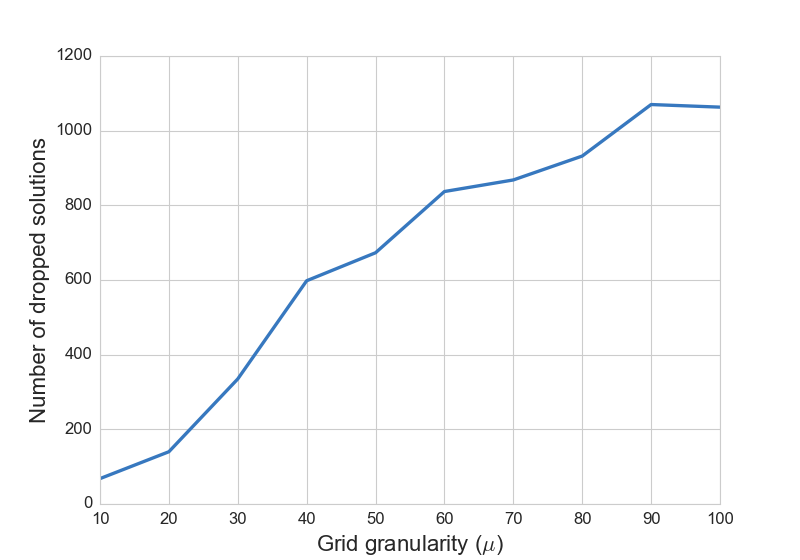

In [22]:
fig, ax = plt.subplots()

index = np.arange(len(granularity))
bar_width = 0.4
plt.style.use('seaborn-whitegrid')

plt.plot(granularity, gpu_dropped, color='#3778BF')

ax.set_axisbelow(True)
plt.xlabel(r'Grid granularity ($\mu$)', size=20)
plt.ylabel('Number of dropped solutions',size=20)

fig.savefig('drop_rate.eps', bbox_inches='tight')

<IPython.core.display.Javascript object>


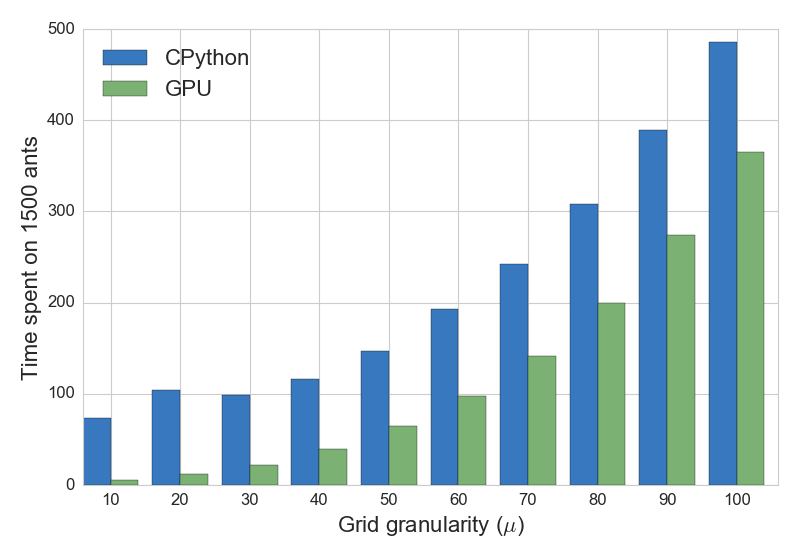

In [21]:
fig, ax = plt.subplots()

index = np.arange(len(granularity))
bar_width = 0.4
rects = []
plt.style.use('seaborn-whitegrid')

plt.bar(index, cpu_result, bar_width, color=COLORS[0], label='CPython')
plt.bar(index + bar_width, gpu_result, bar_width, color=COLORS[2], label='GPU')

ax.set_axisbelow(True)
plt.xlabel(r'Grid granularity ($\mu$)', size=20)
plt.ylabel('Time spent on 1500 ants', size=20)
plt.xticks(index + bar_width, granularity)
plt.legend(loc='upper left', prop={'size':15})
plt.tight_layout()

lgd = plt.legend(['CPython', 'GPU'], loc='upper left', prop={'size':20})

fig.savefig('gpu_vs_cpu.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

<IPython.core.display.Javascript object>


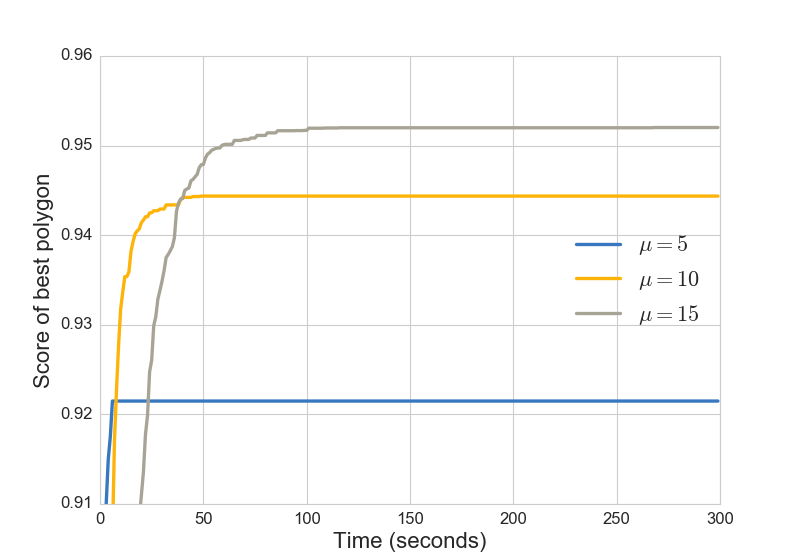

In [19]:
data = pickle.load(open(osp.join(SAVE_DIR, '02.19, multileveling server/results.pickle'), 'rb'))
data = np.array(data)
# data = data[1:7]
data = np.take(data, [2,3,4], axis=0)

data = data.T[0:300].T
x = range(data.shape[1])


sns.set(rc={"figure.figsize": (10, 7),"lines.linewidth": 3}, font_scale=1.5)
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))
sns.set_palette(sns.xkcd_palette(colors))
sns.set_style("whitegrid")

labels = [
#           'With multi-leveling', 
          r'$\mu = 5$', 
          r'$\mu = 10$', 
          r'$\mu = 15$',
          r'$\mu = 30$',
          r'$\mu = 60$'
         ]
fig, ax = plt.subplots()

ax.set_xlabel('Time (seconds)',size=20)
ax.set_ylabel('Score of best polygon',size=20)
ax.set_ylim([0.91,0.96])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
lgd = plt.legend(labels, loc='center right', prop={'size':20})

fig.savefig('granularity_tuning_bw.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

Mangler figuren med my=15